
Land area - Full Map



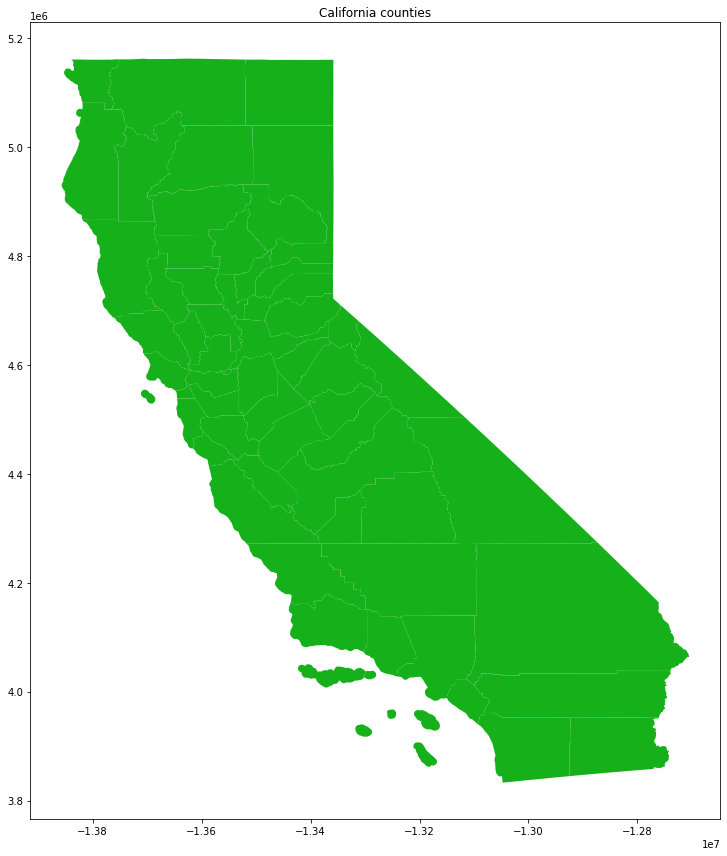


Water Areas - Full Map



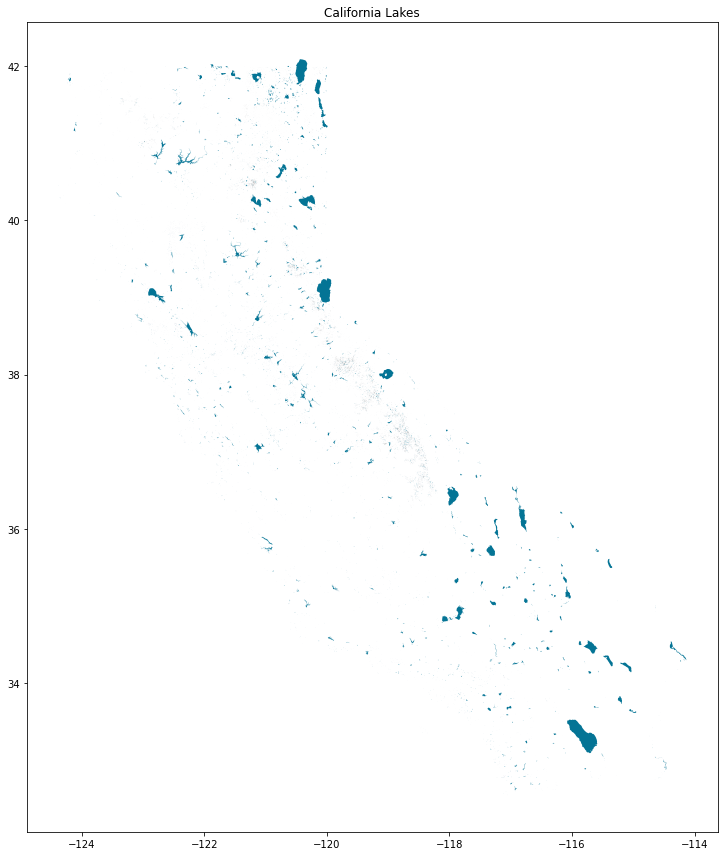


superimposed image - Full Map



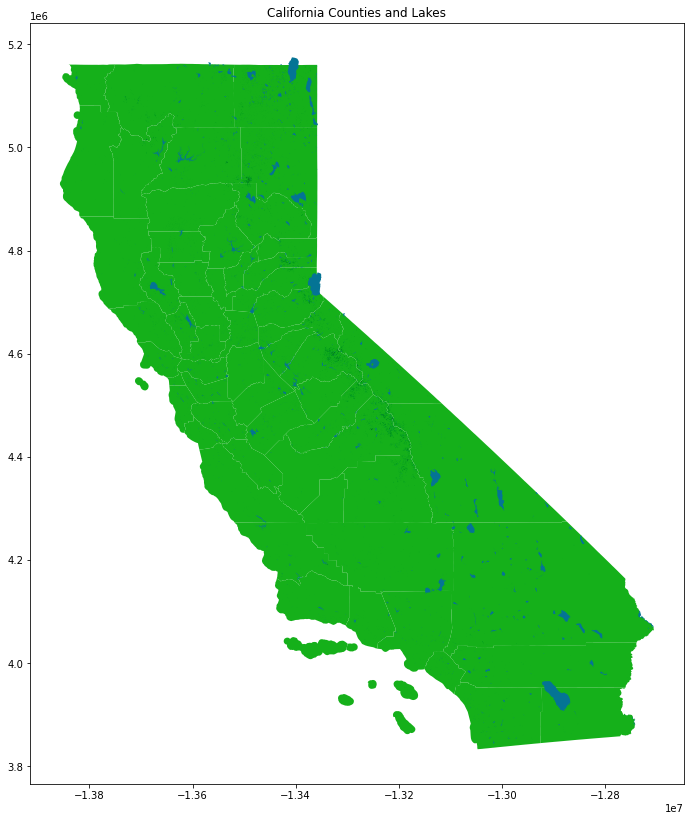

Enter Index of the waterbody to analyse :  9


Data of Selected water body : 
dfgwaterid : 9
-----------------------
type : None
-----------------------
name : White
-----------------------
gnis_name : White
-----------------------
gnis_id : 269006.0
-----------------------
county : Siskiyou
-----------------------
quad_name : LOWER
-----------------------
quad_code : 41121H6
-----------------------
lat_nad83 : 41.994778
-----------------------
lon_nad83 : -121.633244
-----------------------
utm_zone : 10.0
-----------------------
utm_n_n83 : 4.650100e+06
-----------------------
utm_e_n83 : 613201.864414
-----------------------
mtr : M48N
-----------------------
elev_ft : 4093
-----------------------
sfc_acres : 814.471819
-----------------------
geometry : MULTIPOLYGON
-----------------------

Waterbody Plot


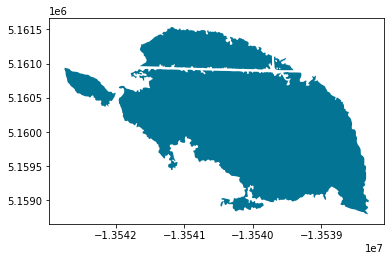

In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
import os
import warnings
from sentinelhub import SHConfig
from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig

#------------------------------------


config = SHConfig()
warnings.filterwarnings('ignore')
if config.instance_id == '':
    print("Warning! To use WFS functionality, please configure the `instance_id`.")
config.sh_client_id="1d23d3ce-8c95-4db0-93af-bbbc2e21f062"
config.sh_client_secret="o3y%6mnQERZCulkn50Rd8][5GyQt4<g>-~3bxT2_"
config.instance_id ="aa05c9cf-52f3-472e-8523-e45716c5550d"
if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")
config.save()
file = "E:\Downloads\ca-county-boundaries\CA_Counties\CA_Counties_TIGER2016.shp"
counties = gpd.read_file(file)
counties.shape


#----------------------------------------


fig, ax = plt.subplots(figsize=(12,12))
counties.plot(ax=ax,color='xkcd:green')
plt.title("California counties")
plt.tight_layout()
print("\n================\nLand area - Full Map\n================\n")
plt.show()
print("\n================\nWater Areas - Full Map\n================\n")
file = "E:\Downloads\stanford-zx543xm6802-shapefile\zx543xm6802.shp"
lakes = gpd.read_file(file)
lakes.shape
fig, ax = plt.subplots(figsize=(12,12))
lakes.plot(ax=ax, color='xkcd:sea blue')
plt.title("California Lakes")
plt.tight_layout()
plt.show()
print("\n================\nsuperimposed image - Full Map\n================\n")
lakes_projected = lakes.to_crs({'init': 'epsg:3857'})
fig, ax = plt.subplots(figsize=(14,14))
counties.plot(ax=ax,color='xkcd:green')
lakes_projected.plot(markersize=1, color='xkcd:sea blue',ax=ax)
plt.title("California Counties and Lakes")
plt.show()
no = input("Enter Index of the waterbody to analyse : ")
azalea = lakes_projected[lakes_projected['dfgwaterid'] == int(no)]
azalea.head()
print("Data of Selected water body : ")
for x in azalea.head():
    print (x, ":", str(azalea.head()[x]).split()[1])
    print("-----------------------")
    
print("\n=========\nWaterbody Plot\n=========")
azalea.plot(color='xkcd:sea blue');

In [31]:
search_bbox = BBox(bbox=[-123.050516,37.845040,-122.523172,38.249508], crs=CRS.WGS84)

search_time_interval = ('2019-08-01T00:00:00', '2019-08-15T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)
wfs_iterator.get_tiles()

[('10SDG', '2019-8-13', 0),
 ('10SEG', '2019-8-13', 0),
 ('10SDH', '2019-8-13', 0),
 ('10SEH', '2019-8-13', 0),
 ('10SDG', '2019-8-11', 0),
 ('10SEG', '2019-8-11', 0),
 ('10SDH', '2019-8-11', 0),
 ('10SEH', '2019-8-11', 0),
 ('10SDG', '2019-8-8', 0),
 ('10SEG', '2019-8-8', 0),
 ('10SDH', '2019-8-8', 0),
 ('10SEH', '2019-8-8', 0),
 ('10SDG', '2019-8-6', 0),
 ('10SEG', '2019-8-6', 0),
 ('10SDH', '2019-8-6', 0),
 ('10SEH', '2019-8-6', 0),
 ('10SDG', '2019-8-3', 0),
 ('10SEG', '2019-8-3', 0),
 ('10SDH', '2019-8-3', 0),
 ('10SEH', '2019-8-3', 0),
 ('10SDG', '2019-8-1', 0),
 ('10SEG', '2019-8-1', 0),
 ('10SDH', '2019-8-1', 0),
 ('10SEH', '2019-8-1', 0)]

In [32]:
from sentinelhub import AwsTile

tile_id = 'S2A_OPER_MSI_L1C_TL_VGS2_20200815T224802_A026894_T10TEL_N02.09'
tile_name, time, aws_index = AwsTile.tile_id_to_tile(tile_id)
tile_name, time, aws_index

('10TEL', '2020-8-15', 0)